#Voter Registration Data Project

To begin analyzing the data that will be used in the project, we need to load in the pandas, matplotib, seaborn, and geopandas libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

Next, we need to load in the dataframe we will be using for the project. It shows how many people registered to vote in 2016 and 2020. The data is from 11 states and the District of Colombia.

In [ ]:
voters= pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

  You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.


The purpose of the project is to observe trends of voter registration. It is comparing the amount of voters from 2016 and 2020 in different states. The goal is to see what differences in voter registration there are from the two different years and hypothesizing reasons for why any changes occured (possibly because of political beliefs, who the presidental candidates were, and which communities in states had more voters). It is important for someone to read this notebook because they will see the breakdown of voting registration and may build off of it for more specific research. This could include where the amount of new voters is highest and lowest.

Two Research Questions:

- What is the difference in the average voter registration in the three highest states from 2016 to 2020?

- What is the difference in voter registration nation wide from 2016 to 2020?

#Next Part- Data Processing

With our data being loaded into the project, understanding why we are making this project and making research questions that can outline parts of the data- it is time to process the data.

The first step for this is to show the first five rows of data and explain what the variable names are.

In [ ]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


- Jurisdiction is the states name
- Year is the year the voters data is from (2016 and 2020)
- Month is whichever month the data is from
- New registered voters is the number of people who registered to vote for the specific month in either 2016 or 2020

Next, we need to check for any missing data

In [ ]:
voters.isna().sum()

,0
Jurisdiction,0
Year,0
Month,0
New registered voters,0


None of the columns has any missing data, so we are able to proceed with the next steps

Now we need to check the data types so we know what we are working with and what we may be able to graph later on

In [ ]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Some of the column names are long and strange. Lets change Jurisdiction to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook

In [ ]:
voters = voters.rename(columns= {"Jurisdiction":"NAME",
                         "New registered voters": "registered_voters"})

After looking at the data, are there any potential limits?

- There is only data for 11 states and the District of Colombia, the data is not an accurate representation of the nation's voter registration
- There is no way to know if the data represents the whole population (some people may not have reported that they registered to vote or they weren't counted)
- The data is only from January to April, voters may have registered in later months and are not counted in the data

#Next Part- Data Analysis

After processing the data, it is time to analyze it

Lets look at when the highest amount of new voter registration was showing the state, month, year, and number of registered voters

In [ ]:
voters.registered_voters.max()
voters.loc[voters.registered_voters == 238281]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


For this we look at what number of registered voters is the maximum and filter the dataset to give us the state name, year, month, and amount of voters that correlate to the number

Lets look at the average voter registration

In [ ]:
voters.registered_voters.mean()

48223.46226415094

Using the average voter registration amount, lets make a new dataframe called "high_voters" that shows only the times where voter registration was higher than your above average and how many times this happened

In [ ]:
high_voters= voters.loc[voters.registered_voters > 48223.46226415094]
high_voters

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


We are taking the voters dataframe and isolating the times wher the voter registration was above average. Those values are being stored in a new dataframe called high_voters. Voter registration was higher than the average 93 times

Next, lets see how many times each state went above the national average for new voter registration

In [ ]:
high_voters.NAME.value_counts()

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


Lets look at which three states had the highest average voter registration overall, showing only the top three results

In [ ]:
voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending= False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


We are grouping the data by state name and registered voters, finding the average amount of voters, sorting the values from highest to lowest, and taking the top 3 values.

#Next Part- Data Visualization

Lets start plotting the data to be able to see any trends.
**We will start by creating a plot showing the voter registratation by state**

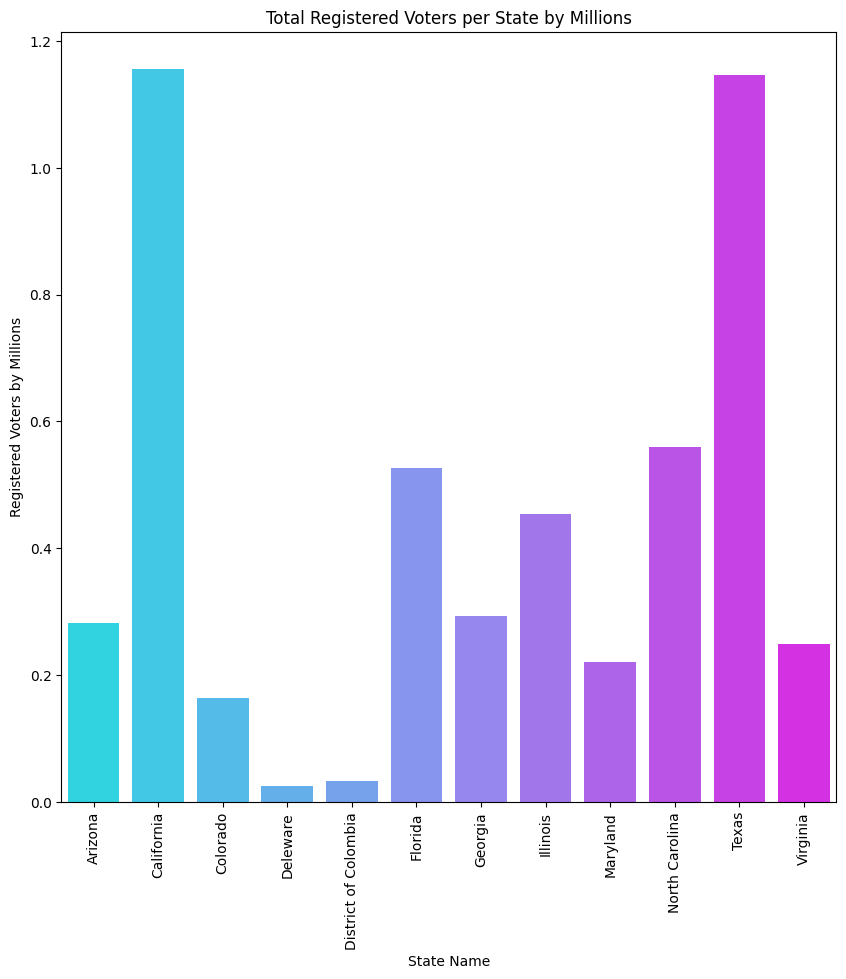

In [ ]:
voters["total"] = voters.groupby("NAME")["registered_voters"].transform("sum")/ 1e6

labels = ["Arizona", "California", "Colorado", "Deleware",
          "District of Colombia", "Florida", "Georgia", "Illinois", "Maryland",
          "North Carolina", "Texas", "Virginia"]

fig=plt.figure(1,figsize=(10,10))
ax=fig.add_subplot()
sns.barplot(voters, x = "NAME", y= "total", hue= "NAME", palette = "cool")
plt.title("Total Registered Voters per State by Millions")
plt.xlabel("State Name",fontsize=10)
plt.ylabel("Registered Voters by Millions",fontsize=10)
plt.xticks(ticks = range(len(labels)), labels= labels, rotation = 90)
plt.show()

As we are visualizing the count of registered voters for each state (categorical data), we need to use a barplot. We made a new column (total) in the voters dataframe that finds the sum of voters by state and divides it by 1e6 (one million) to make it a more managable number. We use the NAME and and new total columns to visualize the data, adding appropriate labels and changing the color palette.

From the barplot we can see that the larger states have a higher total of registered voters. These include California and Texas. The smaller states and districts, Deleware and District of Colombia, have a lower total of registered voters. State and population size influences the amount of registered voters.

**Next we will make a plot that compares voter registation in 2016 and 2020**

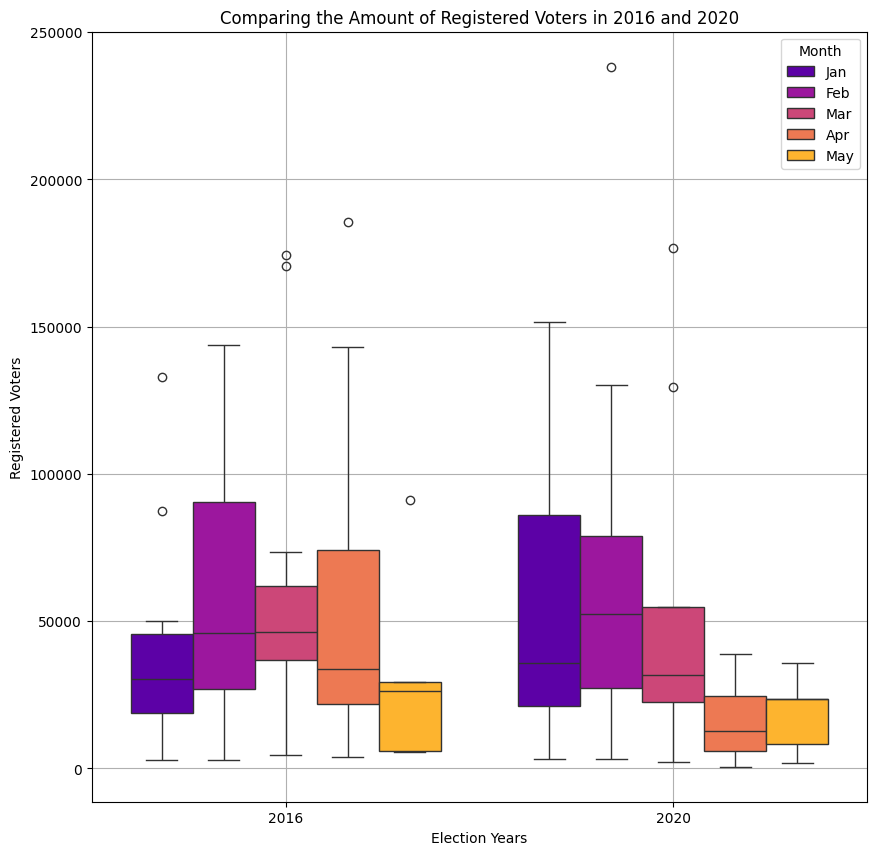

In [ ]:
fig=plt.figure(1,figsize=(10,10))
ax=fig.add_subplot()
sns.boxplot(voters,x="Year",y="registered_voters",palette= "plasma", hue= "Month", saturation=1)
plt.xlabel("Election Years",fontsize=10)
plt.ylabel("Registered Voters",fontsize=10)
plt.title("Comparing the Amount of Registered Voters in 2016 and 2020")
plt.grid()
plt.show()

In this plot we are comparing a categorical variable and a numberic variable. The best plot to use for this is a box plot. We grouped the data on the x axis by year and the y axis by registered voters. As we are looking at voter registration we should look at how many registered based on the month. To do so, the boxes were color coded by the month. The approprate labels were added and the color palette was changed.

From the boxplot we can see that there are more registered voters in 2020 than there was in 2016. January of 2020 and February of 2016 have the largest amount of registered voters. March has the most outliers in 2020. 2016 has more outliers than 2020 does.

For the final visualization we are going to visualize one of the research questions from the first section.
**We will be making a plot that compares the change in average voter registration in the top 3 states from 2016 to 2020**

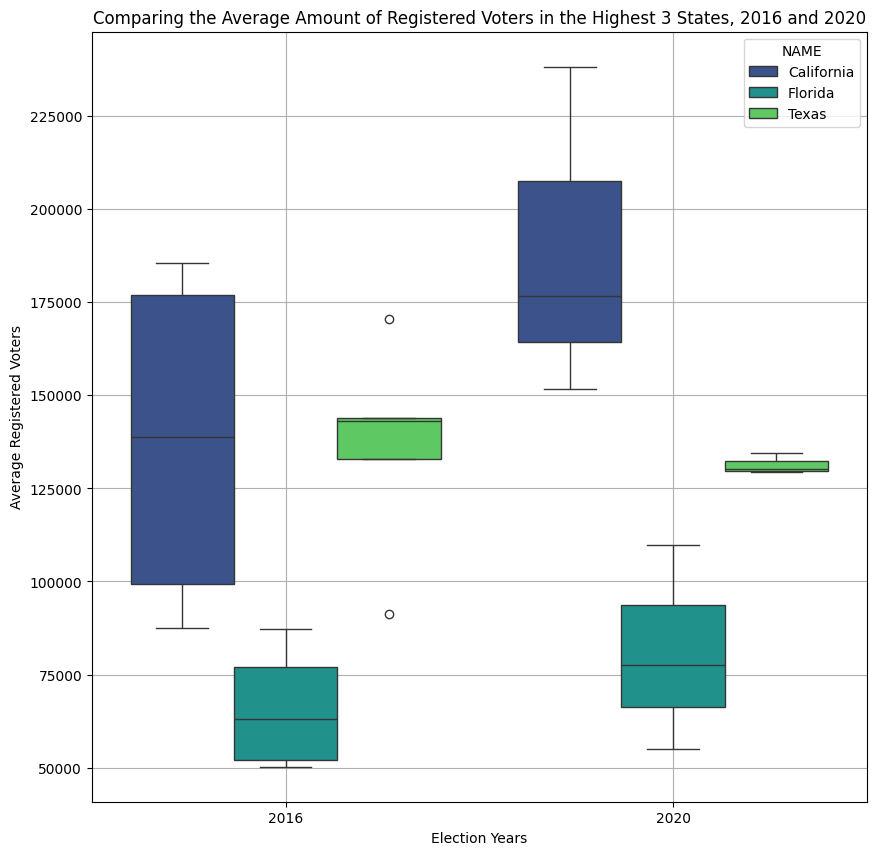

In [ ]:
three_high= high_voters[high_voters["NAME"].isin(["California", "Texas", "Florida"])]

fig=plt.figure(1,figsize=(10,10))
ax=fig.add_subplot()
sns.boxplot(three_high,x="Year",y="registered_voters",palette= "viridis", hue= "NAME", saturation=1)
plt.xlabel("Election Years",fontsize=10)
plt.ylabel("Average Registered Voters",fontsize=10)
plt.title("Comparing the Average Amount of Registered Voters in the Highest 3 States, 2016 and 2020")
plt.grid()
plt.show()

In this plot we are once again using a boxplot because it is comparing a categorical variable and a numeric variable. The states with the highest average of voters were stored in a separate dataframe to use in the visual. Using the new three_high dataframe, the year was plotted on the x axis and the average number of registered voters was set to the y axis. Appropriate labels were added and the color palette was changed.

From the boxplot we can see some changes occured in the average amount of voters from 2016 to 2020. California and Florida increased while Texas decreased. The range of voters in 2020 increased from 2016. The outliers seen in 2016 are gone in 2020. It appears that the average amount of voters has overall increased from 2016 to 2020.

#Next Part- Mapping

In this part of the project, we will be mapping the voter registration data. To be able to do so, we have to load a shape file into the project and merge the data together

First we have to load in our shape file data

In [ ]:
!git clone https://github.com/SFord87/325-Datasets

fatal: destination path '325-Datasets' already exists and is not an empty directory.


In [ ]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

We loaded the shape file and stored it under "states" to make it easier to call on in our code

Next we need to set our continental US bounding box to be able to map our data later on

In [ ]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

Now we will create a new dataframe that shows the average voter registration per state

In [ ]:
avg_voters=voters.groupby("NAME")["registered_voters"].mean().reset_index()

To be able to map this dataframe we need to merge it with the shape file

In [ ]:
state_votes= bbox.merge(avg_voters, on="NAME", how="left")

The avg_voters dataframe does not have information for every state. We will filter the states that have information and store it in another dataframe to use later

In [ ]:
votes_info= state_votes[state_votes["STUSPS"].isin(["DE", "DC", "CO", "MD", "VA", "AZ", "GA", "NC", "IL", "FL", "TX", "CA"])]
voting= votes_info.sort_values(by= "registered_voters", ascending=True)

The states in the original dataset are stored in a dataframe that has a geometry column, allowing use to map this new dataframe.

Now we can map the data. Lets make a map that includes a boundary map of the continental US data and the states that we have the voter registration information for highlighted in a color map. We can also include the average number of registered voters and show that in a legend

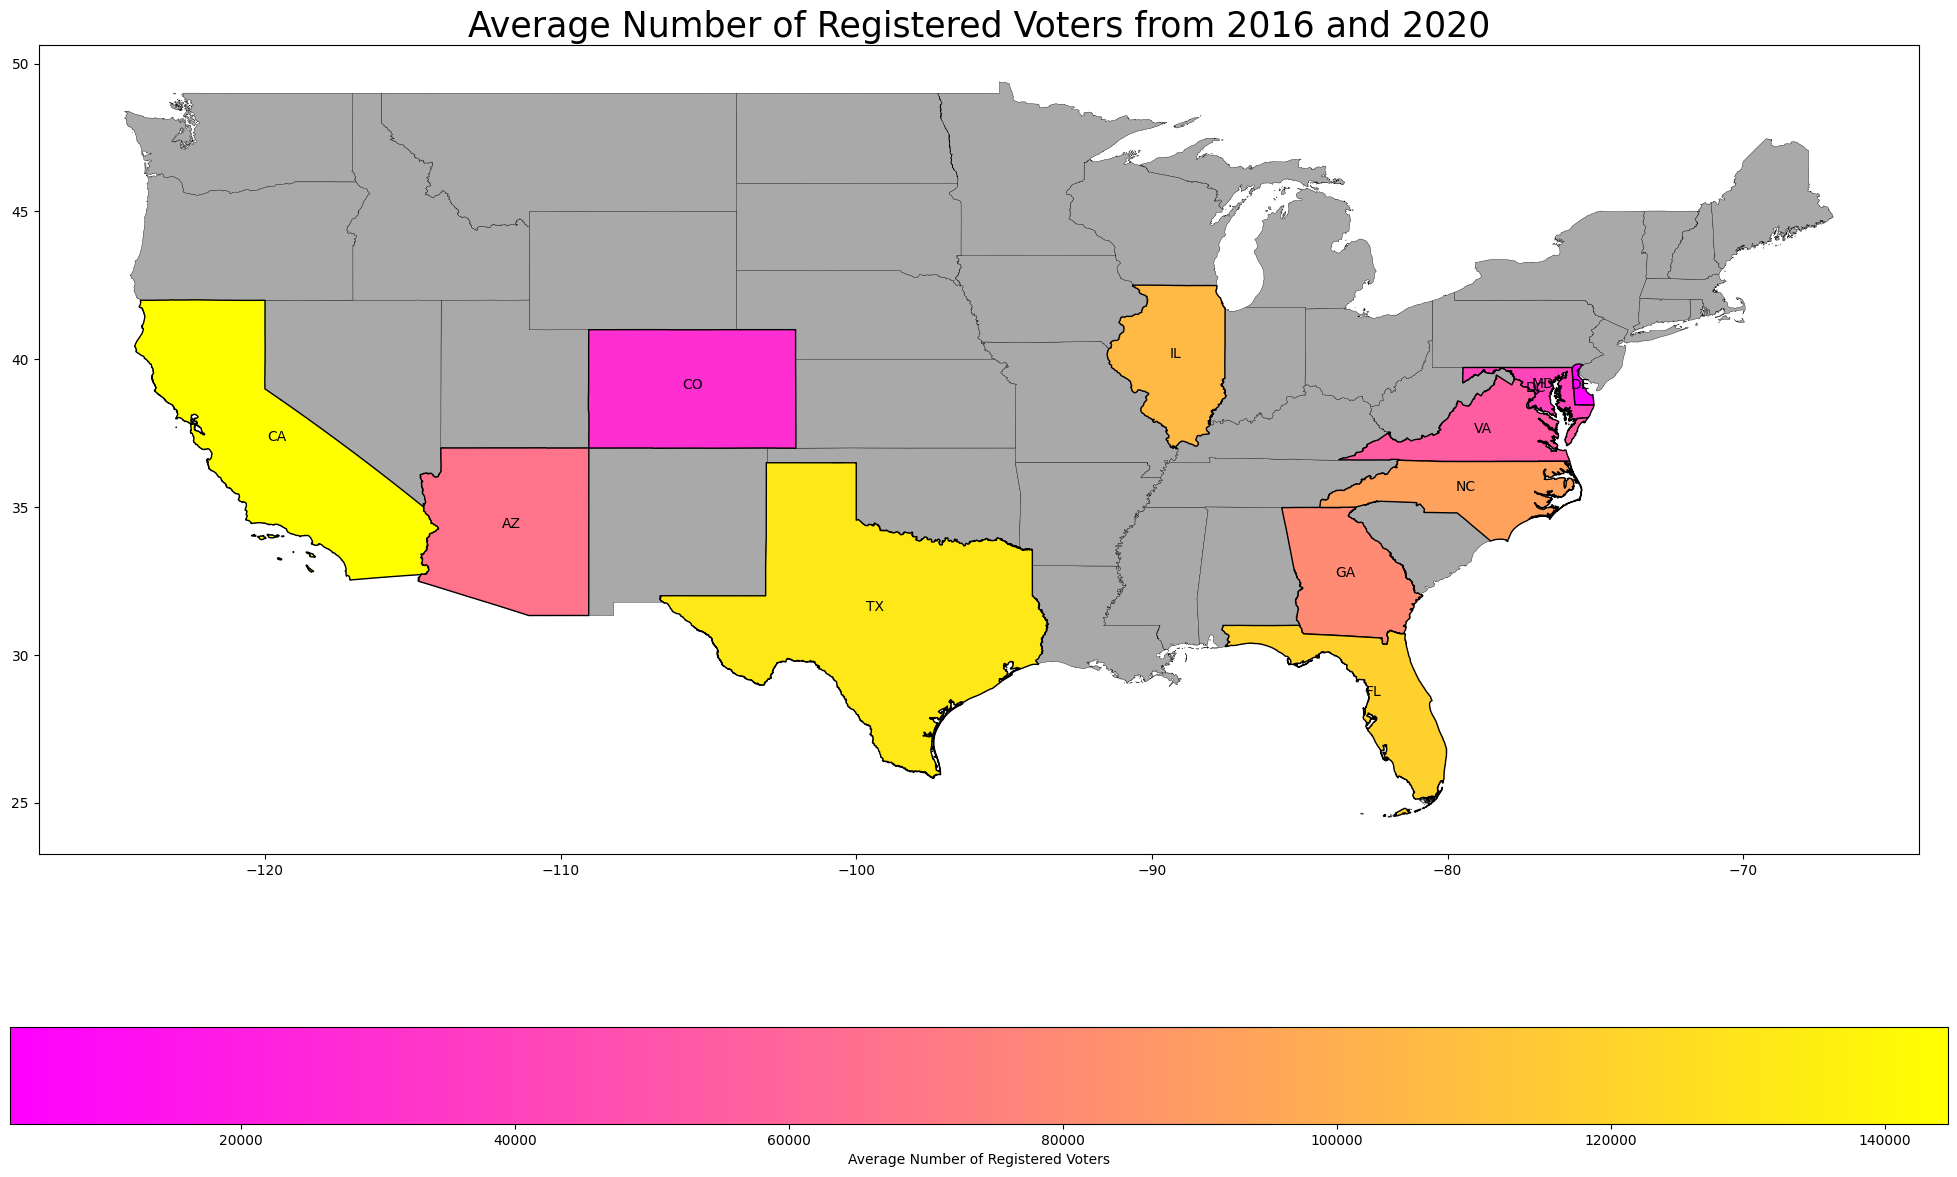

In [ ]:
fig=plt.figure(1,figsize=(25,15))
ax=fig.add_subplot()
state_votes.plot(ax=ax, color= "darkgray", edgecolor = "black", linewidth=.25)
voting.plot(column = "registered_voters", ax = ax, legend = True, cmap="spring",
          legend_kwds={"label": "Average Number of Registered Voters",
            "orientation": "horizontal"})
voting.apply(lambda x: ax.annotate(text=x.STUSPS,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="center",fontsize=10),axis=1)
voting.plot(ax=ax, edgecolor="black", cmap="spring")
plt.title("Average Number of Registered Voters from 2016 and 2020", fontsize = 25)
plt.show()

#Conclusion

- Insights: the insights/outcomes of your notebook

From this project we can see that voter registration increased from 2016 to 2020. Several states had an increase that was above average. We can also see that voter registration changed from 2016 to 2020 from when voters registered during the year.

- Suggestions: Any suggestions or ideas you could offer your client

The suggestions I would offer the client are to gather state level data that shows which communities have the larger number of registered voters. I would also suggest to expand the years of the dataset to see a larger trend. Finally, I would suggest the client to include all months of the year to observe if there is a trend in when people register to vote.

- Possible next steps: At least one step that you would take if continuing to work with this project

A possible next step if this project were to be continued is to expand the years of study. It would be interesting to compare the amount of people registering to vote before and after COVID-19. Another step would also be to gather data on all 50 states. Having information on the national level will give a larger picture as to what changes occured from 2016 to 2020.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Juliana Robilotti

#Link to GitHub

https://github.com/Jrobilotti2/325-Midterm/blob/main/325_Midterm.ipynb